Timer started: t= 22.012993057  seconds


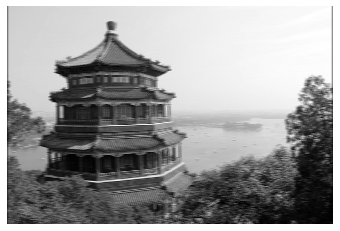

--------------------------------------------------
Timer stopped: t= 23.010454128  seconds
Elapsed time: 0.017 [min]
--------------------------------------------------


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_sample_image

from functools import partial
import tensorflow_datasets as tfds

# Python 3.7 new material
import time

# Declare global time variables
t1_start = 0.0
t1_stop  = 0.0

# Usage:
# start_timer()
#  ... Your code executes
# end_timer()

# Run at the begining:
def start_timer():
    global t1_start
    t1_start = time.perf_counter()
    print("Timer started: t=", t1_start, " seconds")

# Run when done:
def end_timer():
    global t1_stop
    t1_stop = time.perf_counter()
    print("--------------------------------------------------")
    print("Timer stopped: t=", t1_stop, " seconds")
    print("Elapsed time: %5.3f [min]" % ((t1_stop-t1_start)/60.0))
    print("--------------------------------------------------") 
    
start_timer()

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

end_timer()